In [1]:
%pylab inline
import numpy as np
import scipy 
import matplotlib.pyplot as plt



Populating the interactive namespace from numpy and matplotlib


### Excercise 1

$f(x)=exp(-\alpha x^{2})\rightarrow \hat{f}(k)
=\frac{1}{\sqrt{2a}}exp\left (  -\frac{k^{2}}{4\alpha }\right )$

In [2]:
L=20
n=128
x_2=np.linspace(-L/2,L/2,n+1)
x=[]
for i, c in enumerate (x_2):
    x.append(c)
x=np.array(x)
u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)
abs_ut=abs(ut)
abs_utshift=abs(utshift)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


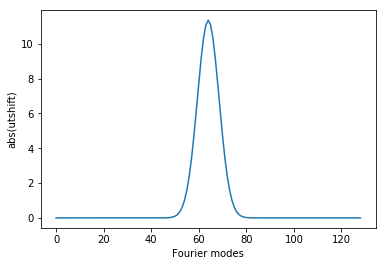

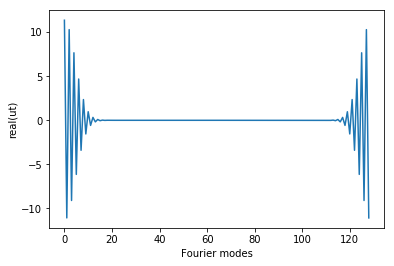

In [3]:
plt.figure()
plt.plot(x,u,'k') 
plt.xlabel('x')
plt.ylabel('u=exp(-$x^{2}$)')

plt.figure()
plt.plot(abs_ut)
plt.xlabel('Fourier modes')
plt.ylabel('abs(ut)')

plt.figure()
plt.plot(abs_utshift)
plt.xlabel('Fourier modes')
plt.ylabel('abs(utshift)')

plt.figure()
plt.plot(ut)
plt.xlabel('Fourier modes')
plt.ylabel('real(ut)')

plt.figure()
plt.plot(utshift)
plt.xlabel('Fourier modes')
plt.ylabel('real(ut)');

### Excercise 2

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


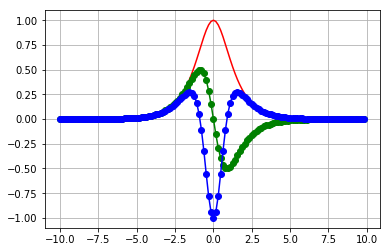

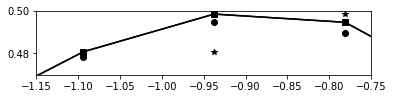

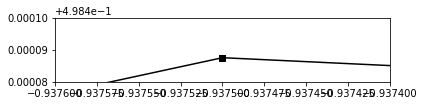

In [4]:
L=20
n=128
x_22=np.linspace(-L/2,L/2,n+1)
x2=[]
for i, c in enumerate (x_22):
    if i<n:
        x2.append(c)
x2=np.array(x2)

dx=x2[2]-x2[1]

u=1/np.cosh(x2)
ut=np.fft.fft(u)
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2)
two=np.append(forw,back)
k=(2*np.pi/L)*two

#FFT calculada de las derivadas

ut1=1j*k*ut
ut2=-k*k*ut
u1=np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real
u1exact=-(1/np.cosh(x2))*(np.sinh(x2)/np.cosh(x2))
u2exact=(1/np.cosh(x2))-2*(1/np.cosh(x2))**3

#CÃ¡lculo de la primera derivada por diferencias finitas

##2nd-order accurate
ux=[]
ux.append((-3*u[0]+4*u[1]-u[2])/(2*dx))

for j in range(1,n-1):
    ux.append((u[j+1]-u[j-1])/(2*dx))        
ux.append((-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx) )
ux=np.array(ux)

#4th-order accurate

ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))

for j in range(1,n-2):
    ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))
ux2=np.array(ux2)

plt.figure()
plt.plot(x2,u,'r',x2,u1,'g',x2,u1exact,'go',x2,u2,'b',x2,u2exact,'bo')
plt.grid(True)

plt.figure()
grid(True)
plt.subplot(3,1,1)
plt.plot(x2,u1exact,'ks-')
plot(x2,u1,'k')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-1.15, -0.75)
ylim(0.47 ,0.5)
show()

plt.subplot(3,1,2)
plot(x2,u1exact,'ks-')
plot(x2,u1,'kv')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.49848, 0.49850)
show()

plt.subplot(3,1,3)
plot(x2,u1exact,'ks-')
plot(x2,u1,'kv')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.498487, 0.498488)
show()

## 12.2 FFT Application: Radar Detection and Filtering

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


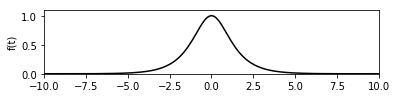

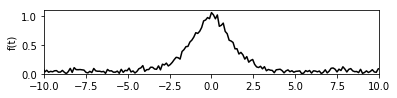

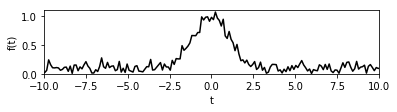

In [8]:
L=30
n=512
t2=linspace(-L,L,n+1)
t=t2[0:n-1]
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2)
two=np.append(forw,back)
k=(2*np.pi/(2*L))*two
u=1/np.cosh(t)

noise=1
ut=np.fft.fft(u)
r1=[]
r2=[]
for i in range(0,n-1):
    r1.append(np.random.uniform(0,3))
    r2.append(1j*random.uniform(0,3))
utn=ut+noise*r1+noise*r2
un =np.fft.ifft(utn)

figure()
subplot(3,1,1)
plot(t,u,'k')
xlim(-10, 10)
ylim(0, 1.1)
ylabel('f(t)')
show()

subplot(3,1,2)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
ylabel('f(t)')
show()

#Incrementando el ruido

noise_2=2
ut=np.fft.fft(u)
r3=[]
r4=[]
for i in range(0,n-1):
    r3.append(np.random.uniform(0,3))
    r4.append(1j*random.uniform(0,3))
    
r3=np.array(r3)
r4=np.array(r4)
utn=ut+r3*noise_2+r4*noise_2
un=np.fft.ifft(utn)

subplot(3,1,3)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
xlabel('t')
ylabel('f(t)')
show()

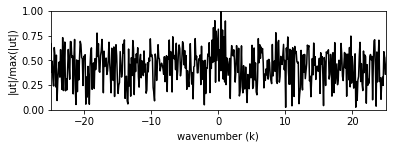

In [11]:
noise=10
ut=np.fft.fft(u)
r5=[]
r6=[]
for i in range(0,n-1):
    r5.append(np.random.uniform(0,3))
    r6.append(1j*random.uniform(0,3))
    
r5=np.array(r3)
r6=np.array(r4)
unt=ut+r5*noise+r6*noise
un =np.fft.ifft(unt)

figure()
subplot(2,1,1)
plot(t,abs(un),'k')
xlim(-30, 30)
ylim(0, 2)
xlabel('time (t)')
ylabel('|u|')
show()

subplot(2,1,2)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
xlim(-25, 25)
ylim(0, 1)
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

$$F (k) = exp(-\tau(k-k_o)^2)$$


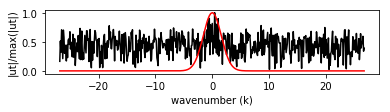

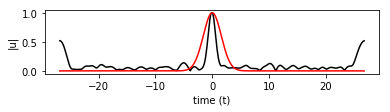

In [20]:
filterr=exp(-0.2*(k[0:len(k)-1]**2))
unft=filterr*unt
unf=np.fft.ifft(unft)

figure

subplot(3,1,1)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

subplot(3,1,3)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unf))/max(abs(fftshift(unf))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('time (t)')
ylabel('|u|')
show()


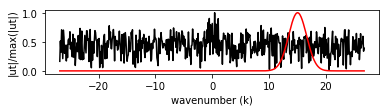

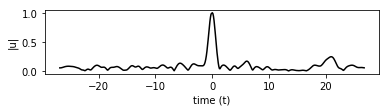

In [25]:
filterr=exp(-0.2*((k[0:len(k)-1]-15)**2))
unft=filterr*unt
unf=np.fft.ifft(unft)
figure

subplot(3,1,1)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

subplot(3,1,3)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unf))/max(abs(fftshift(unf))),'k')
xlabel('time (t)')
ylabel('|u|')
show()

## 12.3 FFT Application: Radar Detection and Averaging

In [117]:
L=30
n=512

t2=linspace(-L,L,n+1)
t=t2[0:n]
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2)
two=np.append(forw,back)
k=(2*np.pi/(2*L))*two
ks=np.fft.fftshift(k)
noise=10
realize=np.array([1,2,5,100])
utn=[]
r1=[]
r2=[]
dat=[]
for jj in range(len(realize)):
    u=1/np.cosh(t)
    ave=[]
    ut=np.fft.fft(u)
    for j in range(len(realize)):
        
        a=np.random.uniform(0,1,n)*noise+1j*np.random.uniform(0,1,n)*noise+ut
        utn.append(a)
        utn=np.array(utn)
        
        
        dat.append(abs(np.fft.fftshift(a))/np.max(abs(utn)))
        

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [99]:
len(utn)


16

In [95]:
b=np.random.uniform(0,1,n)
len(b),len(ut)

(512, 512)

In [90]:
np.random.uniform?
